# Data Mining Lab 2

Student Information
Name: 張雲澔

Student ID: 106020011

GitHub ID: howard52517

Kaggle name: yunhaoz

Kaggle private scoreboard snapshot:

![kaggle](pics/kaggle.jpg)

---
# First part : take home exercises
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [6]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [7]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [8]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [10]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [136]:
# Answer here

import nltk
import numpy as np
# 先做token
NLTKer = CountVectorizer(tokenizer=nltk.word_tokenize) 

df = pd.concat([train_df,test_df], ignore_index=True)
NLTKer.fit(df['text'])

data_features = NLTKer.transform(df['text'])

data_feature_names = NLTKer.get_feature_names()

# 把type轉成list，方便運算
tt = []
for i in data_features.toarray():
    tt.append(list(i))

# 總和出各個feature在各檔案中的總數
sum = np.sum(tt, axis = 0)

# 將feature和其frequency合併成一個tuple，方便等下排序
total_feature_num = len(data_feature_names)
feature_and_frequency = []
for i in range(total_feature_num):
    feature_and_frequency.append((data_feature_names[i],sum[i]))

# 根據frequency排序
sorted_feature_and_frequency = sorted(feature_and_frequency,key=lambda x:x[1],reverse=True)

# 列出前30個
for i in range(30):
    print(sorted_feature_and_frequency[i])

D:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


('#', 4291)
('@', 2451)
('.', 2385)
('the', 1878)
('i', 1793)
(',', 1446)
('to', 1424)
('a', 1314)
('and', 1044)
('!', 1006)
('is', 878)
('of', 874)
('you', 865)
('it', 787)
('in', 690)
("'s", 594)
('that', 586)
('my', 585)
("n't", 535)
('for', 501)
('?', 479)
('on', 435)
('be', 419)
('me', 412)
('do', 375)
('this', 365)
('so', 356)
('have', 351)
('just', 330)
('not', 330)


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [12]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [13]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [14]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

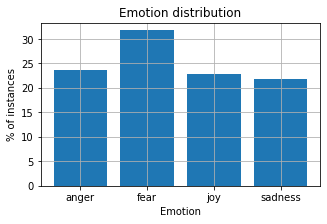

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [18]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [19]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [20]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [21]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [23]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [24]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [25]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

D:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [26]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'customer',
 'damn']

In [28]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [138]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000,smooth_idf=True)
vectorizer.fit(train_df['text'])
train_data_BOW_features_1000 = vectorizer.transform(train_df['text'])

# observe some feature names
feature_names_1000 = vectorizer.get_feature_names()
feature_names_1000[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [149]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [31]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'sadness', 'fear', 'sadness', 'fear', 'joy', 'joy',
       'sadness', 'joy', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [32]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.64


In [33]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [34]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [35]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

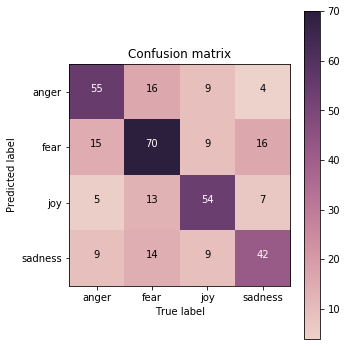

In [36]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [37]:
# Answer here
# Accuracy = (55+70+54+42)/347 = 0.637

# each row 對應到各個 label 的 precision，也就是說 判斷為 A 時，確實為 A 的比例。
# precision of anger = 55/(55+16+9+4) = 0.655
# precision of fear = 70/(15+70+9+16) = 0.636
# precision of joy = 54/(5+13+54+7) = 0.684
# precision of sadness = 42/(9+14+9+42) = 0.568

# each column 對應到各個 label 的 recall，也就是說 實際為 A 時，判斷為 A 的比例。
# recall of anger = 55/(55+15+5+9) = 0.655
# recall of fear = 70/(16+70+13+14) = 0.619
# recall of joy = 54/(9+9+54+9) = 0.667
# recall of sadness = 42/(4+16+7+42) = 0.609


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [153]:
# Answer here
from sklearn.naive_bayes import GaussianNB
# build Naive Bayes model
gnb = GaussianNB()

# training
gnb_model = gnb.fit(X_train.toarray(), y_train)

# predict
y_train_pred = gnb_model.predict(X_train.toarray())
y_test_pred = gnb_model.predict(X_test.toarray())

# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.77
testing accuracy: 0.67


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [39]:
# Answer here

# Decision Tree
# training accuracy: 0.99
# testing accuracy: 0.64

# Naive Bayes
# training accuracy: 0.77
# testing accuracy: 0.67

# 可以看到前者的training accuracy非常高，後者則相對低很多，但是後者的testing accuracy卻比前者高，很明顯是因為前者overfitting了，
# 因為基本的Decision Tree model沒有做到prune的動作，所以在training model時，容易overfitting training data；而Naive Bayes會根據
# 不同的label的條件機率去調整模型的參數，所以overfitting training data的情形才不會太嚴重，使得預測testing data時的效果較好。


---

# Third part : Kaggle Competition

## 資料讀取與整理

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#先將哪筆資料是train,test以及對應的label是甚麼建成一個表，方便等下讀檔案時，可以先分類，避免全部都混在一起
ident = pd.read_csv('data_identification.csv')
emo = pd.read_csv('emotion.csv')

In [ ]:
dict_ident = {}
for i in range(len(ident)):
    key = ident['tweet_id'][i]
    value = ident['identification'][i]
    dict_ident[key] = value

dict_emo = {}
for i in range(len(emo)):
    key = emo['tweet_id'][i]
    value = emo['emotion'][i]
    dict_emo[key] = value

In [ ]:
#讀json檔時，就順便分train和test
train_id_list = []
train_text_list = []
train_emo_list = []
test_id_list = []
test_text_list = []

In [ ]:
emo_to_num = {'anger':int(0),'anticipation':int(1),'disgust':int(2),'fear':int(3),'sadness':int(4),'surprise':int(5),'trust':int(6),'joy':int(7)}

In [ ]:
with open('tweets_DM.json','r') as f:
    for i in range(1867535):
        line = f.readline()
        temp_dict = eval(line)
        temp_id = temp_dict['_source']['tweet']['tweet_id']
        temp_text = temp_dict['_source']['tweet']['text']
        if dict_ident[temp_id] == 'train':
            train_id_list.append(temp_id)
            train_text_list.append(temp_text)
            emo_str = dict_emo[temp_id]
            train_emo_list.append(emo_to_num[emo_str])
        else:
            test_id_list.append(temp_id)
            test_text_list.append(temp_text)

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

In [ ]:
df_train['id'] = train_id_list
df_train['text'] = train_text_list
df_train['emo'] = train_emo_list
df_test['id'] = test_id_list
df_test['text'] = test_text_list

## 資料前處理與跑模型

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [ ]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=5000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(df_train['text'])

train_data_BOW_features_500 = BOW_500.transform(df_train['text'])

## check dimension
train_data_BOW_features_500.shape

In [ ]:
#xgboost
from xgboost import XGBClassifier
xgbc = XGBClassifier(
    n_estimators=1500, #樹的個數
    learning_rate=0.05,
    max_depth=5, #越大越容易overfitting
    subsample=0.825, #隨機取樣訓練樣本 訓練例項的子取樣比
    gamma=0.1613, #控制是否後剪枝的引數 越大越保守 一般 0.1,0.2
    reg_lambda=1.71, #L2正則化項係數 越大越不容易overfitting
    max_delta_step=0,
    colsample_bytree=0.6, #預設為1 越小越容易overfitting
    reg_alpha=2.16, #L1正則項係數 如果取值大於0 類別樣本不平衡的情況下有助快速收斂 平衡正負權重
    scale_pos_weight=10,
    objective='multi:softmax',
    use_label_encoder=False,
    num_class=8
)
xgbc = xgbc.fit(X_train, y_train)

y_pred_xgbc = xgbc.predict(X_test)

In [ ]:
num_to_emo = {'0':'anger','1':'anticipation','2':'disgust','3':'fear','4':'sadness','5':'surprise','6':'trust','7':'joy'}

In [ ]:
y_pred_xgbc2 = []
for i in list(y_pred_xgbc):
    y_pred_xgbc2.append(num_to_emo[str(i)])

In [ ]:
#輸出答案
file_name = 'XG3.csv' #可變動

df_answer = pd.DataFrame(list(zip(test_id_list,y_pred_xgbc2)),columns=['id','emotion'])
df_answer.to_csv(file_name,index=False)

In [ ]:
# 分數
# Decision Tree:500 features , Score:0.29
# XG :500 features , 500 trees , Score 0.395 , time:70 min
# XG2 : 1000 features , 500 trees , Score 0.406 , time:70 min
# XG3 : 5000 features , 1500 trees , Score 0.436 , time:250 min

# 對XG來說，feature數量不太影響訓練時間，tree數量才會

### 資料前處理失敗的部分

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
X_counts = count_vect.fit_transform(df_train.text)

In [ ]:
#資料太大，沒辦法用這個方法
for i in range(794208):
    temp_list = []
    for j in range(1455563):
        temp_list.append(X_counts[j].toarray()[0][i])
    df_train[str(i)] = temp_list
    print(i,end='\r')

In [ ]:
#用sample當資料，對features進行壓縮
df_sample = df_train.sample(10000)
df_test['emo'] = np.zeros((len(df_test),))

df_test_part1 = df_test[0:4000]

#先將train,test合併，方便處理起來有同一套features
df = pd.concat([df_sample, df_test_part1], sort=False)

X_counts = count_vect.fit_transform(df.text)

from sklearn.decomposition import PCA

m = 1000
X_reduced = PCA(n_components = m).fit_transform(X_counts.toarray())

# MemoryError: Unable to allocate 2.93 TiB for an array with shape (811972, 496308) and data type int64

In [ ]:
# feature要先篩好，如果先把全部feature找出來再篩，會沒辦法處理。